In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("echocardiogram.data", sep=",", header=None, error_bad_lines=False)
df.to_excel("output.xlsx")

b'Skipping line 50: expected 13 fields, saw 14\n'


In [3]:
df.columns = ['survival', 'still-alive', 'age-at-heart-attack', 'pericardial-effusion', 'fractional-shortening', 'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult', 'name', 'group', 'alive-at-1']

In [4]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0


In [5]:
df.columns

Index(['survival', 'still-alive', 'age-at-heart-attack',
       'pericardial-effusion', 'fractional-shortening', 'epss', 'lvdd',
       'wall-motion-score', 'wall-motion-index', 'mult', 'name', 'group',
       'alive-at-1'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of     survival  still-alive age-at-heart-attack  pericardial-effusion  \
0         11            0                  71                     0   
1         19            0                  72                     0   
2         16            0                  55                     0   
3         57            0                  60                     0   
4         19            1                  57                     0   
..       ...          ...                 ...                   ...   
126      7.5            1                  64                     0   
127       41            0                  64                     0   
128       36            0                  69                     0   
129       22            0                  57                     0   
130       20            0                  62                     0   

    fractional-shortening    epss   lvdd wall-motion-score wall-motion-index  \
0                   0.260       9  

In [7]:
df.drop(['name', 'group'], axis = 1, inplace = True)

In [8]:
df.replace({'?': 0}, inplace = True)

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y=y.astype('int')

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(X[:, :-1])
X[:, :-1] = imputer.transform(X[:, :-1])

In [11]:
X

array([[11.0, 0.0, 71.0, ..., 14.0, 1.0, '1'],
       [19.0, 0.0, 72.0, ..., 14.0, 1.7, '0.588'],
       [16.0, 0.0, 55.0, ..., 14.0, 1.0, '1'],
       ...,
       [36.0, 0.0, 69.0, ..., 14.5, 1.21, '0.857'],
       [22.0, 0.0, 57.0, ..., 15.0, 1.36, '0.786'],
       [20.0, 0.0, 62.0, ..., 15.5, 1.409, '0.786']], dtype=object)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
print(X_train)

[[34.0 0.0 62.0 ... 19.5 1.95 '0.714']
 [27.0 0.0 47.0 ... 12.0 1.0 '0.857']
 [38.0 0.0 68.0 ... 14.0 1.167 '0.857']
 ...
 [32.0 0.0 65.0 ... 12.0 1.09 '0.785']
 [41.0 0.0 59.0 ... 13.0 1.08 '0.857']
 [1.0 1.0 65.0 ... 21.5 2.15 '0.714']]


In [17]:
print(X_test)

[[40.0 0.0 79.0 0.0 0.15 17.5 4.27 13.0 1.3 '0.714']
 [27.0 0.0 54.0 1.0 0.07 16.8 4.16 18.0 1.5 '0.857']
 [36.0 0.0 69.0 0.0 0.2 7.0 5.05 14.5 1.21 '0.857']
 [26.0 0.0 68.0 0.0 0.26 5.0 4.31 12.0 1.0 '0.857']
 [2.0 1.0 67.0 1.0 0.44 9.0 3.96 17.5 1.45 '0.857']
 [0.25 1.0 68.0 0.0 0.22 21.7 4.85 15.0 1.15 '0.928']
 [25.0 0.0 62.0 0.0 0.258 11.8 4.87 11.0 1.0 '0.786']
 [13.0 0.0 66.0 0.0 0.24 13.6 4.38 22.0 2.2 '0.714']
 [5.0 1.0 65.0 1.0 0.16 8.5 5.47 16.0 1.45 '0.786']
 [0.5 1.0 62.529 1.0 0.07 20.0 5.2 24.0 2.0 '0.857']
 [7.5 1.0 64.0 0.0 0.24 12.9 4.72 12.0 1.0 '0.857']
 [1.0 1.0 52.0 1.0 0.17 17.2 5.32 14.0 1.17 '0.857']
 [0.75 1.0 78.0 0.0 0.05 10.0 4.44 15.0 1.36 '0.786']
 [26.0 0.0 79.0 0.0 0.17 11.9 5.15 10.5 1.05 '0.714']
 [4.0 1.0 58.0 0.0 0.17 28.9 6.73 26.08 2.01 '0.928']
 [22.0 0.0 57.0 0.0 0.13 18.6 4.37 12.33 1.37 '0.642']
 [19.5 1.0 81.0 0.0 0.12 0.0 0.0 9.0 1.25 '0.570']
 [34.0 0.0 54.0 0.0 0.43 9.3 4.79 10.0 1.0 '0.714']
 [49.0 0.0 70.0 1.0 0.25 9.7 5.57 5.5 1.1 '0.35

In [18]:
print(y_train)

[0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1]


In [19]:
print(y_test)

[0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
print(X_train)

[[ 0.70244464 -0.66666667  0.1482894  ...  0.9671232   1.21277879
  -0.19560496]
 [ 0.26896916 -0.66666667 -0.88907145 ... -0.36842218 -0.75355602
   0.39053991]
 [ 0.95014492 -0.66666667  0.56323375 ... -0.01227674 -0.40789506
   0.39053991]
 ...
 [ 0.57859451 -0.66666667  0.35576157 ... -0.36842218 -0.56727167
   0.09541802]
 [ 1.13592013 -0.66666667 -0.05918277 ... -0.19034946 -0.58796993
   0.39053991]
 [-1.34108265  1.5         0.35576157 ...  1.32326864  1.62674401
  -0.19560496]]


In [22]:
print(X_test)

[[ 1.07399506e+00 -6.66666667e-01  1.32396504e+00 -4.57495711e-01
  -4.67217756e-01  8.86822300e-01 -7.32732932e-02 -1.90349462e-01
  -1.32608186e-01 -1.95604960e-01]
 [ 2.68969158e-01 -6.66666667e-01 -4.04969718e-01  2.18581284e+00
  -1.18349779e+00  8.00629019e-01 -1.47049607e-01  7.00014126e-01
   2.81357036e-01  3.90539905e-01]
 [ 8.26294784e-01 -6.66666667e-01  6.32391136e-01 -4.57495711e-01
  -1.95427364e-02 -4.06076909e-01  4.49867839e-01  7.67596146e-02
  -3.18892536e-01  3.90539905e-01]
 [ 2.07044088e-01 -6.66666667e-01  5.63233745e-01 -4.57495711e-01
   5.17667287e-01 -6.52343425e-01 -4.64455429e-02 -3.68422179e-01
  -7.53556019e-01  3.90539905e-01]
 [-1.27915758e+00  1.50000000e+00  4.94076355e-01  2.18581284e+00
   2.12929736e+00 -1.59810393e-01 -2.81188359e-01  6.10977767e-01
   1.77865730e-01  3.90539905e-01]
 [-1.38752645e+00  1.50000000e+00  5.63233745e-01 -4.57495711e-01
   1.59527271e-01  1.40398198e+00  3.15729087e-01  1.65795973e-01
  -4.43082103e-01  6.81562881e-01

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 8, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=8, random_state=0)

In [64]:
y_pred = classifier1.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[21  2]
 [ 0  4]]


In [66]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

92.5925925925926


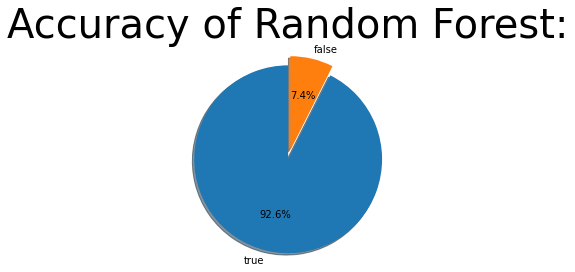

In [68]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'true', 'false'
sizes = [(classifier1.score(X_test, y_test)*100), 100-((classifier1.score(X_test, y_test))*100)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Accuracy of Random Forest:',fontsize=40)
plt.show()

In [69]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [70]:
y_pred = classifier2.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  5]
 [ 0  4]]


In [74]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

81.48148148148148


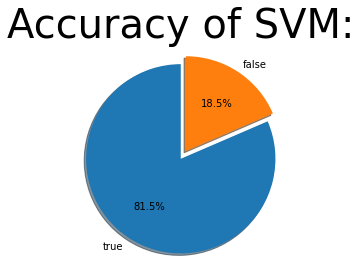

In [75]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'true', 'false'
sizes = [(classifier2.score(X_test, y_test)*100), 100-((classifier2.score(X_test, y_test))*100)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Accuracy of SVM:',fontsize=40)
plt.show()

Text(0, 0.5, 'Frequency')

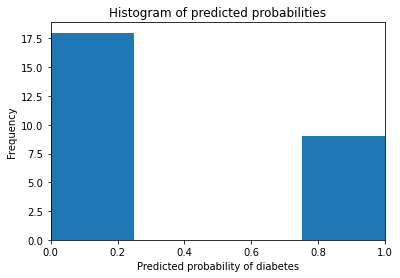

In [45]:
plt.hist(y_pred, bins=4)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

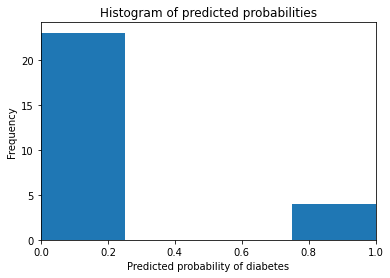

In [46]:
plt.hist(y_test, bins=4)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

(array([23.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

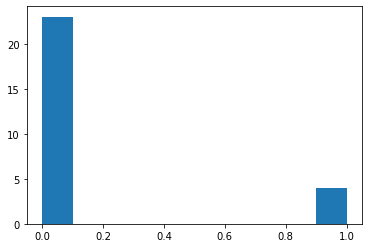

In [55]:
plt.hist(y_test)

(array([18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

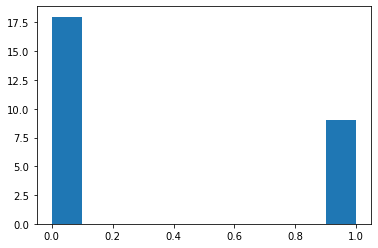

In [56]:
plt.hist(y_pred)

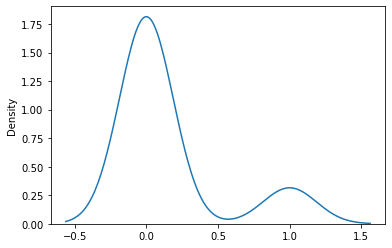

In [58]:
import seaborn as sns
sns.kdeplot(y_test)

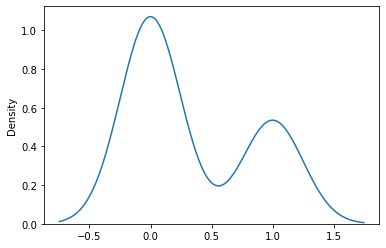

In [59]:
import seaborn as sns
sns.kdeplot(y_pred)

C:\Users\Abdul_Wahab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


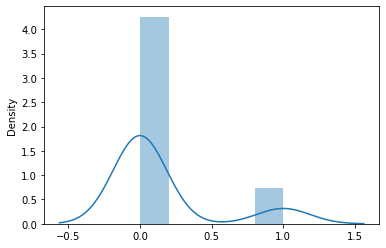

In [62]:
sns.distplot(y_test)

C:\Users\Abdul_Wahab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


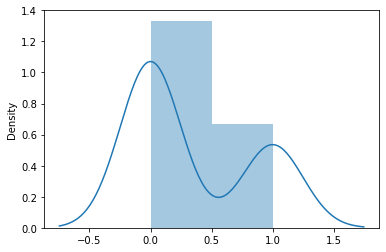

In [64]:
sns.distplot(y_pred);

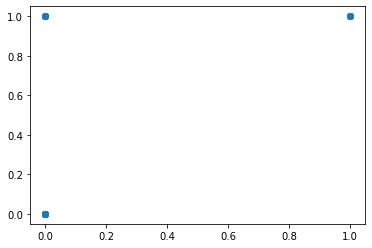

In [65]:
plt.scatter(y_test, y_pred)